# Data Glacier Internship

Deliverable - Week 8

Nahari Terena - LISUM15

## Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

### Import Libraries

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
df = pd.read_csv('Healthcare_dataset.csv', sep = ";")
df.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [3]:
df.shape

(3424, 69)

In [4]:
#Size of the file
os.path.getsize('Healthcare_dataset.csv')

913359

In [5]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [6]:
## Columns types
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [7]:
## Checking if there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [8]:
## Replacing unknown as NA
df_nan = df
df_nan.replace('Unknown', np.nan, inplace = True)

In [9]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3333 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [10]:
## Checking if there is any duplicated row
df_nan.duplicated().sum()

0

In [15]:
## Checking kurtosis
df_nan.kurt(axis=0, skipna=True)

Dexa_Freq_During_Rx    74.758378
Count_Of_Risks          0.900486
dtype: float64

In [16]:
## Checking skewness
df_nan.skew(axis=0, skipna=True)

Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64

In [12]:
## Summary columns
df_nan[["Dexa_Freq_During_Rx", "Count_Of_Risks"]].describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


Text(0, 0.5, 'Frequency')

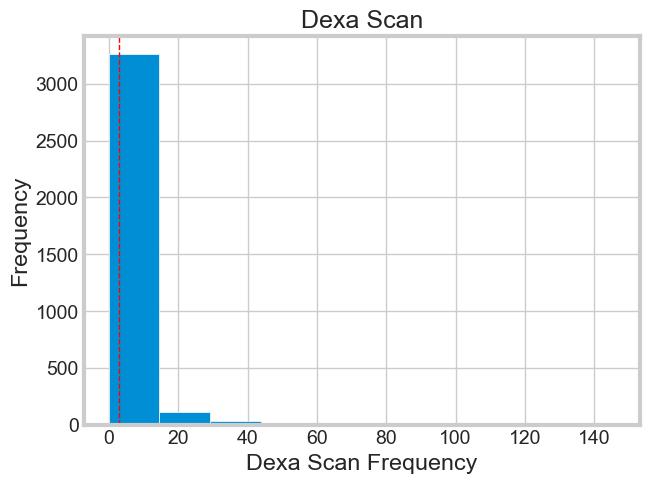

In [43]:
df.hist("Dexa_Freq_During_Rx")

plt.axvline(df.Dexa_Freq_During_Rx.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Dexa Scan", loc="center", fontsize=18)
plt.xlabel("Dexa Scan Frequency")
plt.ylabel("Frequency")


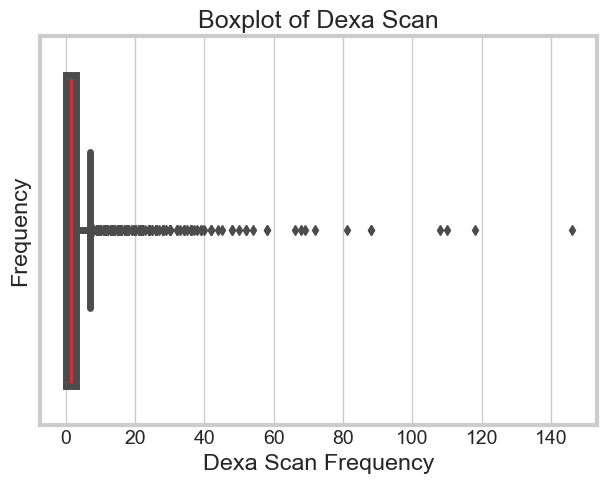

In [36]:
sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x ="Dexa_Freq_During_Rx",data = df_nan,
                  linewidth=5, palette = "Set1", orient = "h")

# Adicionando Título ao gráfico
plt.title("Boxplot of Dexa Scan", loc="center", fontsize=18)
plt.xlabel("Dexa Scan Frequency")
plt.ylabel("Frequency")

plt.show()

In [40]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(df_nan, "Dexa_Freq_During_Rx")
print(len(probable_outliers_tm))

272


In [42]:
print(len(possible_outliers_tm))

460


Text(0, 0.5, 'Frequency')

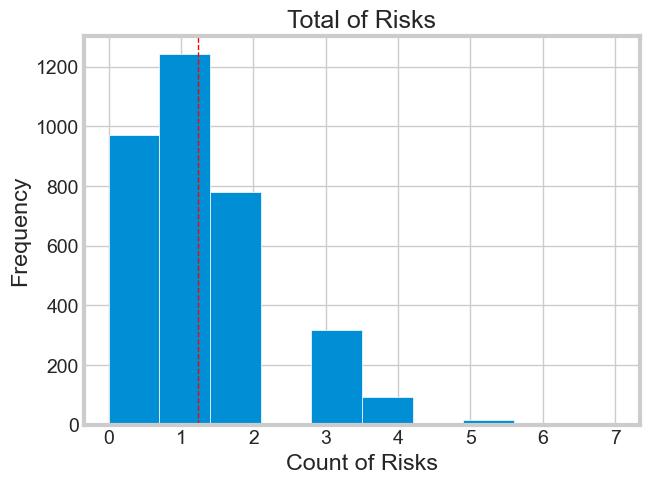

In [44]:
df.hist("Count_Of_Risks")

plt.axvline(df.Count_Of_Risks.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Total of Risks", loc="center", fontsize=18)
plt.xlabel("Count of Risks")
plt.ylabel("Frequency")

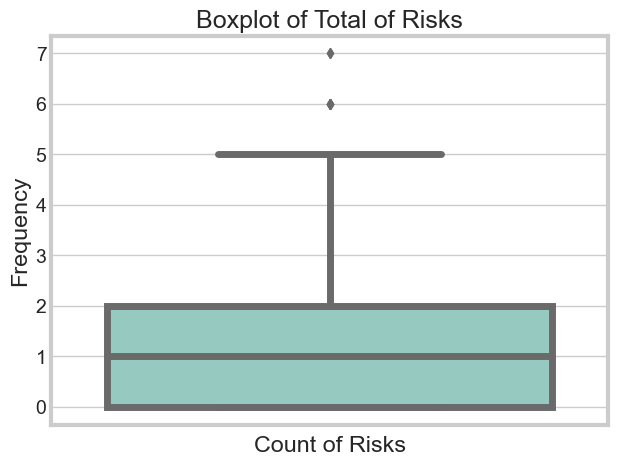

In [14]:
sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( y ="Count_Of_Risks",data = df_nan,
                  linewidth=5, palette = "Set3")

# Adicionando Título ao gráfico
plt.title("Boxplot of Total of Risks", loc="center", fontsize=18)
plt.xlabel("Count of Risks")
plt.ylabel("Frequency")

plt.show()